# Start Python and Check Versions

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


# Load The Data

## Import libraries

In [2]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os

##  Load RAW Dataset

In [ ]:
# Load dataset   
file = os.path.join('Resources','Crimes_2001_to_present.csv')
names = ['Date', 'Primary Type', 'Latitude', 'Longitude']
dataset = pd.read_csv(file)    
dataset = dataset.loc[:, names]
dataset = dataset[dataset['Primary Type'] != 'NON - CRIMINAL' ]
dataset = dataset[dataset['Primary Type'] != 'NON-CRIMINAL' ] 
dataset = dataset[dataset['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)' ]
dataset = dataset.dropna(axis=0, how='any')
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d %H:%M')

In [ ]:
dataset = dataset.dropna(how='any')
print(dataset.shape)
dataset.head()

## Save dataframe to file

In [ ]:
file = os.path.join('Resources', 'Crimes_2001_2019.csv')
dataset.to_csv(file, encoding='utf-8', index=False)

 # Load Down Sized Dataset

In [ ]:
file = os.path.join('Resources','Crimes_2001_2019.csv')
dataset = pd.read_csv(file)

## Peek at the Data

In [ ]:
# head
dataset.head(5)

In [ ]:
# shape and describe
print(dataset.shape)

## Statistical Summary

In [ ]:
# descriptions
print(dataset.describe())

## Distribution

In [ ]:
# distribution
print(dataset.groupby('Primary Type').size())

# DATA EXTRACTION

In [ ]:
options = ['BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'THEFT', 'OTHER OFFENSE', 'BURGLARY']   
# selecting rows based on condition 
df = dataset[dataset['Primary Type'].isin(options)] 

for c in options:
    df.insert(2 + options.index(c), c, 0.0)
    
i = 0  
for c in df['Primary Type']:
    df.iat[i, df.columns.get_loc(c)] = 1.0
    i += 1

df.head()    

In [ ]:
if 'Primary Type' in df:
    del df['Primary Type']
df.columns = [ 'Date', 'battery', 'damage', 'narcotics', 'theft', 'other', 'burglary', 'Latitude', 'Longitude']
df.head() 

In [ ]:
df.battery = df['battery'].astype(numpy.int64)
df.damage = df['damage'].astype(numpy.int64)
df.narcotics = df['narcotics'].astype(numpy.int64)
df.theft = df['theft'].astype(numpy.int64)
df.other = df['other'].astype(numpy.int64)
print(df.dtypes)

In [ ]:
# DATE TIME STAMP FUNCTION
column_1 = pd.to_datetime(pd.Series(df.iloc[:,0]))
#print(type(column_1))
db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [ ]:
if 'Date' in df:
    del df['Date']
df=pd.concat([db,df],axis=1)
df = df.loc[:,~df.columns.duplicated()] 
df = df.loc[df['year']==2018, :]
df.head(10000)

In [ ]:
from random import sample
rindex =  numpy.array(sample(range(len(df)), 2500))
df = df.iloc[rindex, :]
df.head()

In [ ]:
columnsTitles=["day","dayofweek",'dayofyear', 'hour', 'month', 'quarter', 'week', 'weekday', 'weekofyear', \
               'year', 'battery', 'damage', 'narcotics', 'theft', 'other', 'burglary', 'Latitude', 'Longitude']
df=df.reindex(columns=columnsTitles)
df.head()

In [ ]:
print(df.dtypes)
df.year = df['year'].astype(float)
df.month = df['month'].astype(float)
df.day = df['day'].astype(float)
df.day = df['hour'].astype(float)
df.dayofyear = df['dayofyear'].astype(float)
df.dayofyear = df['week'].astype(float)
df.weekofyear = df['weekofyear'].astype(float)
df.dayofweek = df['dayofweek'].astype(float)
df.dayofweek = df['weekday'].astype(float)
df.quarter = df['quarter'].astype(float)
print(df.dtypes)

In [ ]:
df.head()

## Save selected dataframe to file

In [ ]:
file = os.path.join('Resources','Crimes_selected.csv')
df.to_csv(file, encoding='utf-8', index=False)

# Load selected data file ( Start from here to save time for running )

In [3]:
file = os.path.join('Resources','Crimes_selected.csv')
df = pd.read_csv(file)
df.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,battery,damage,narcotics,theft,other,burglary,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772


# Data Visualization

## Univariate Plots

C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


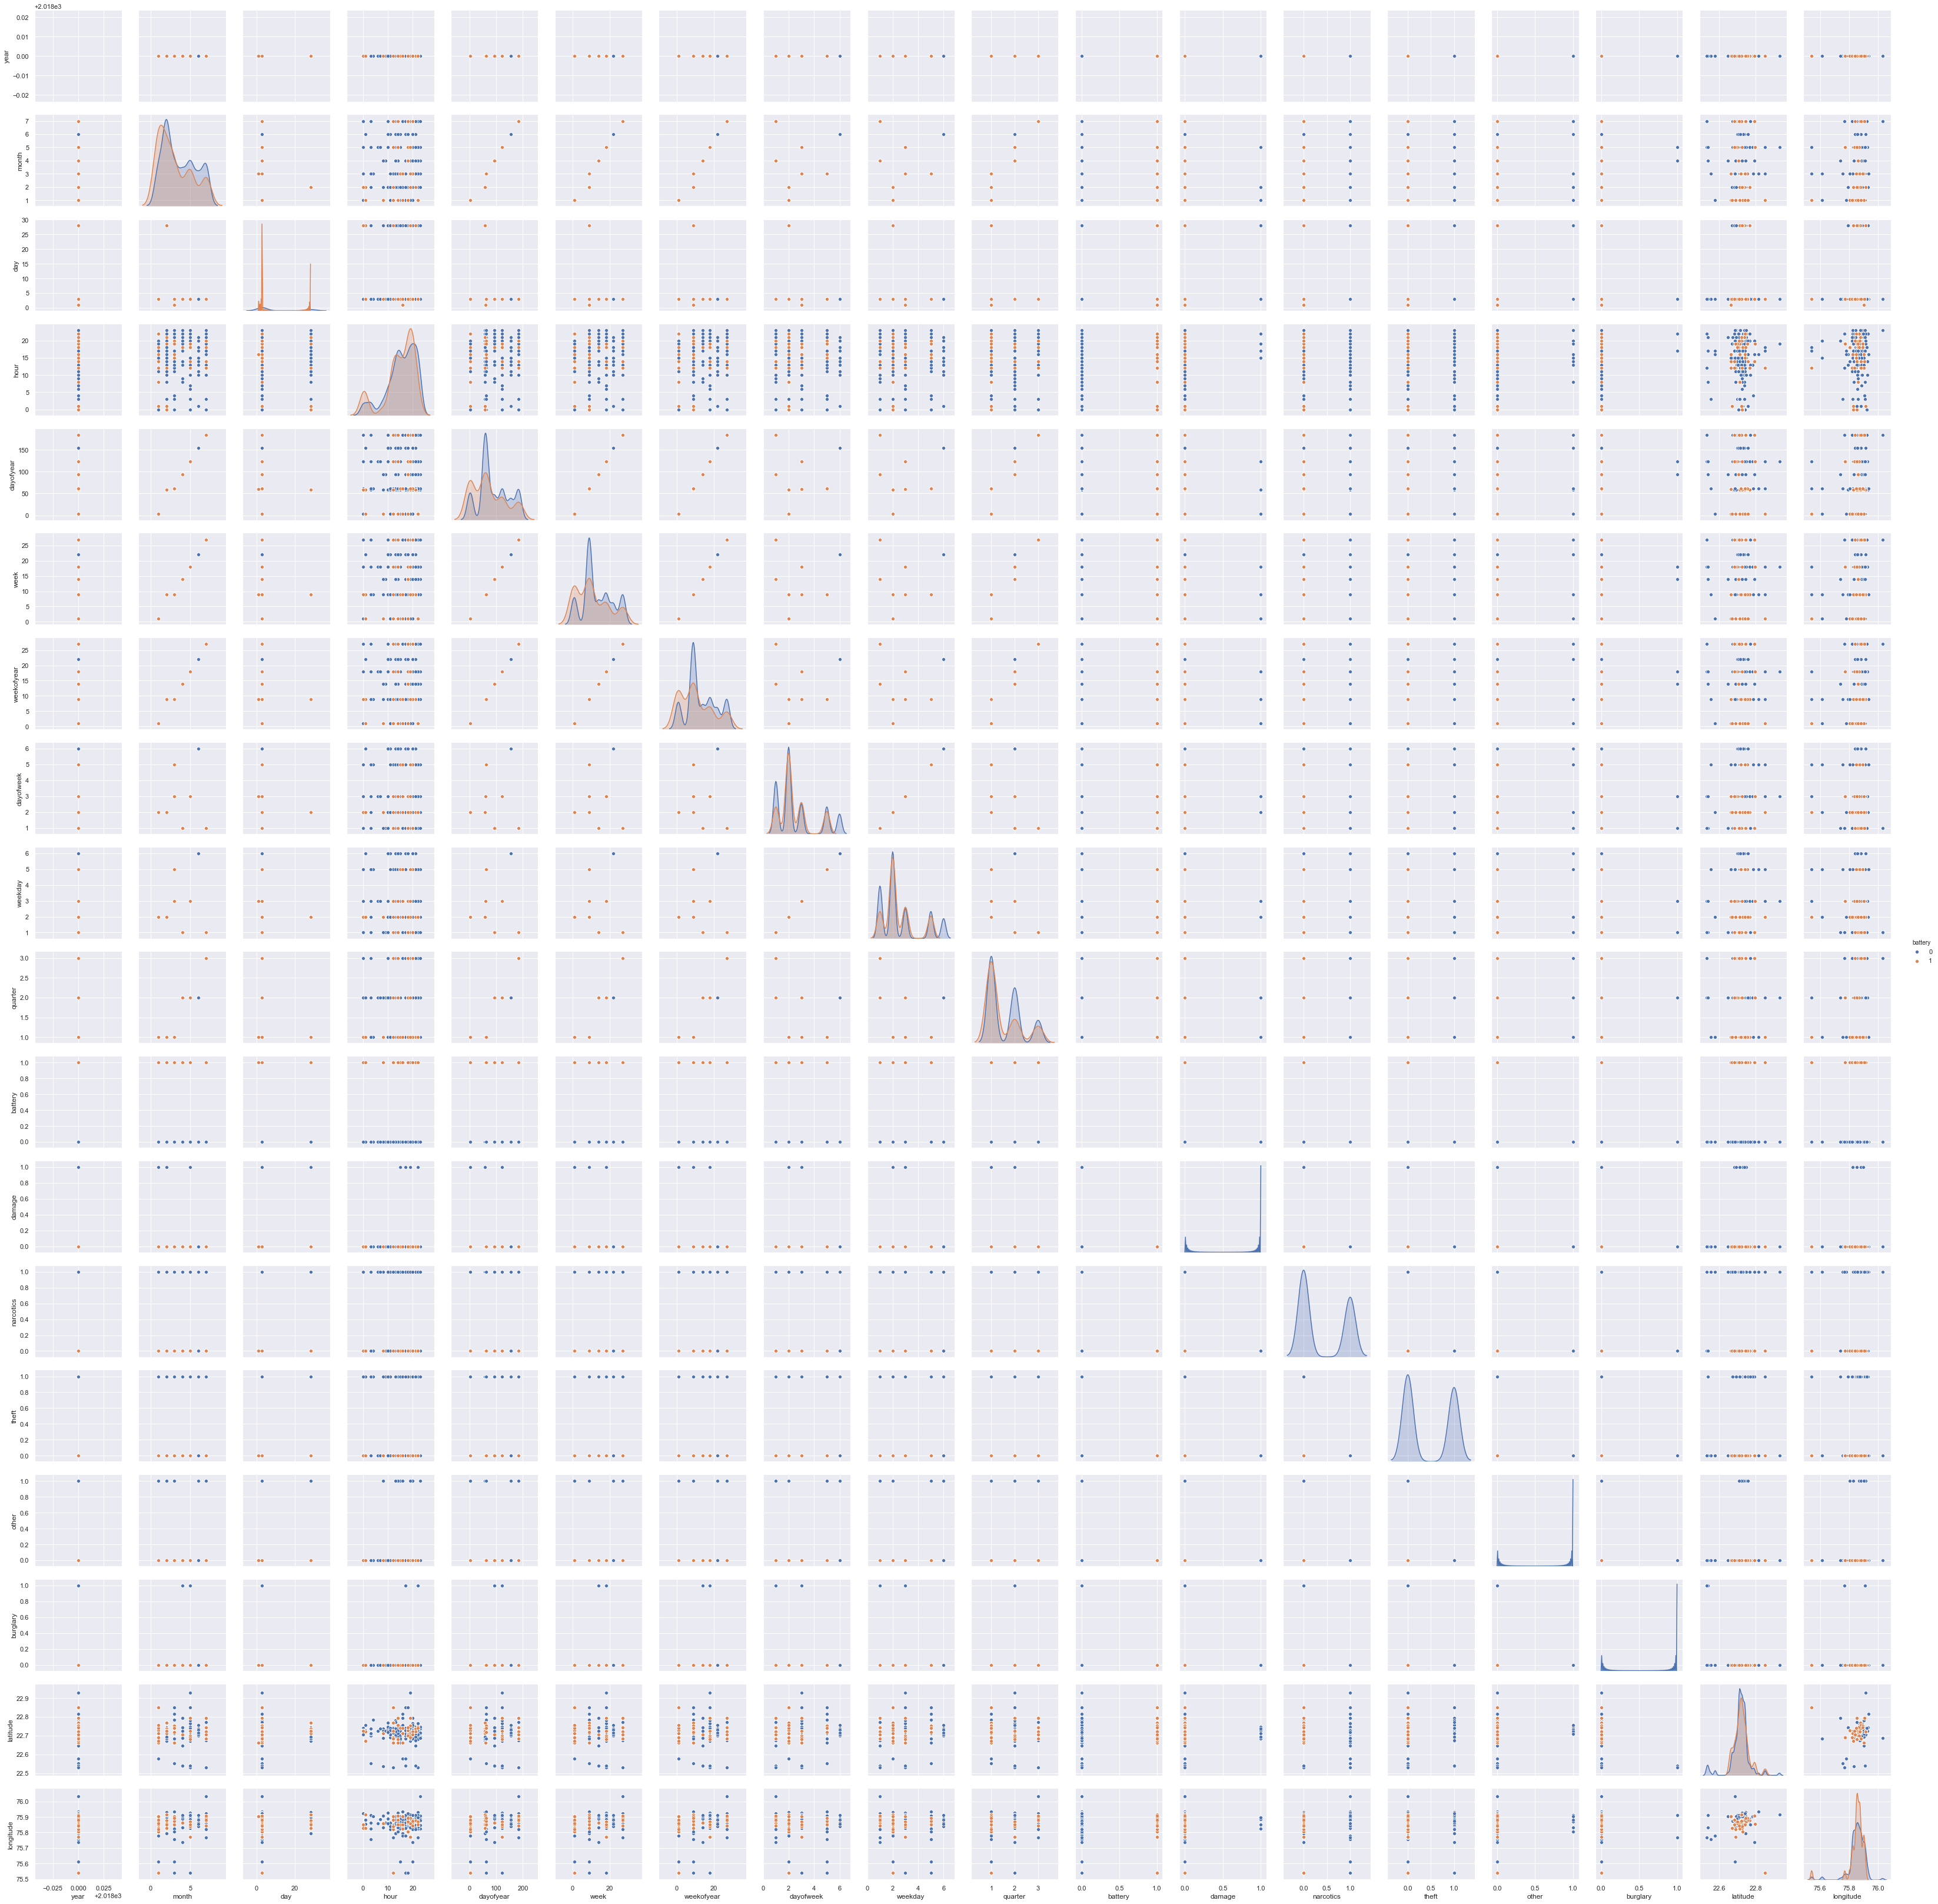

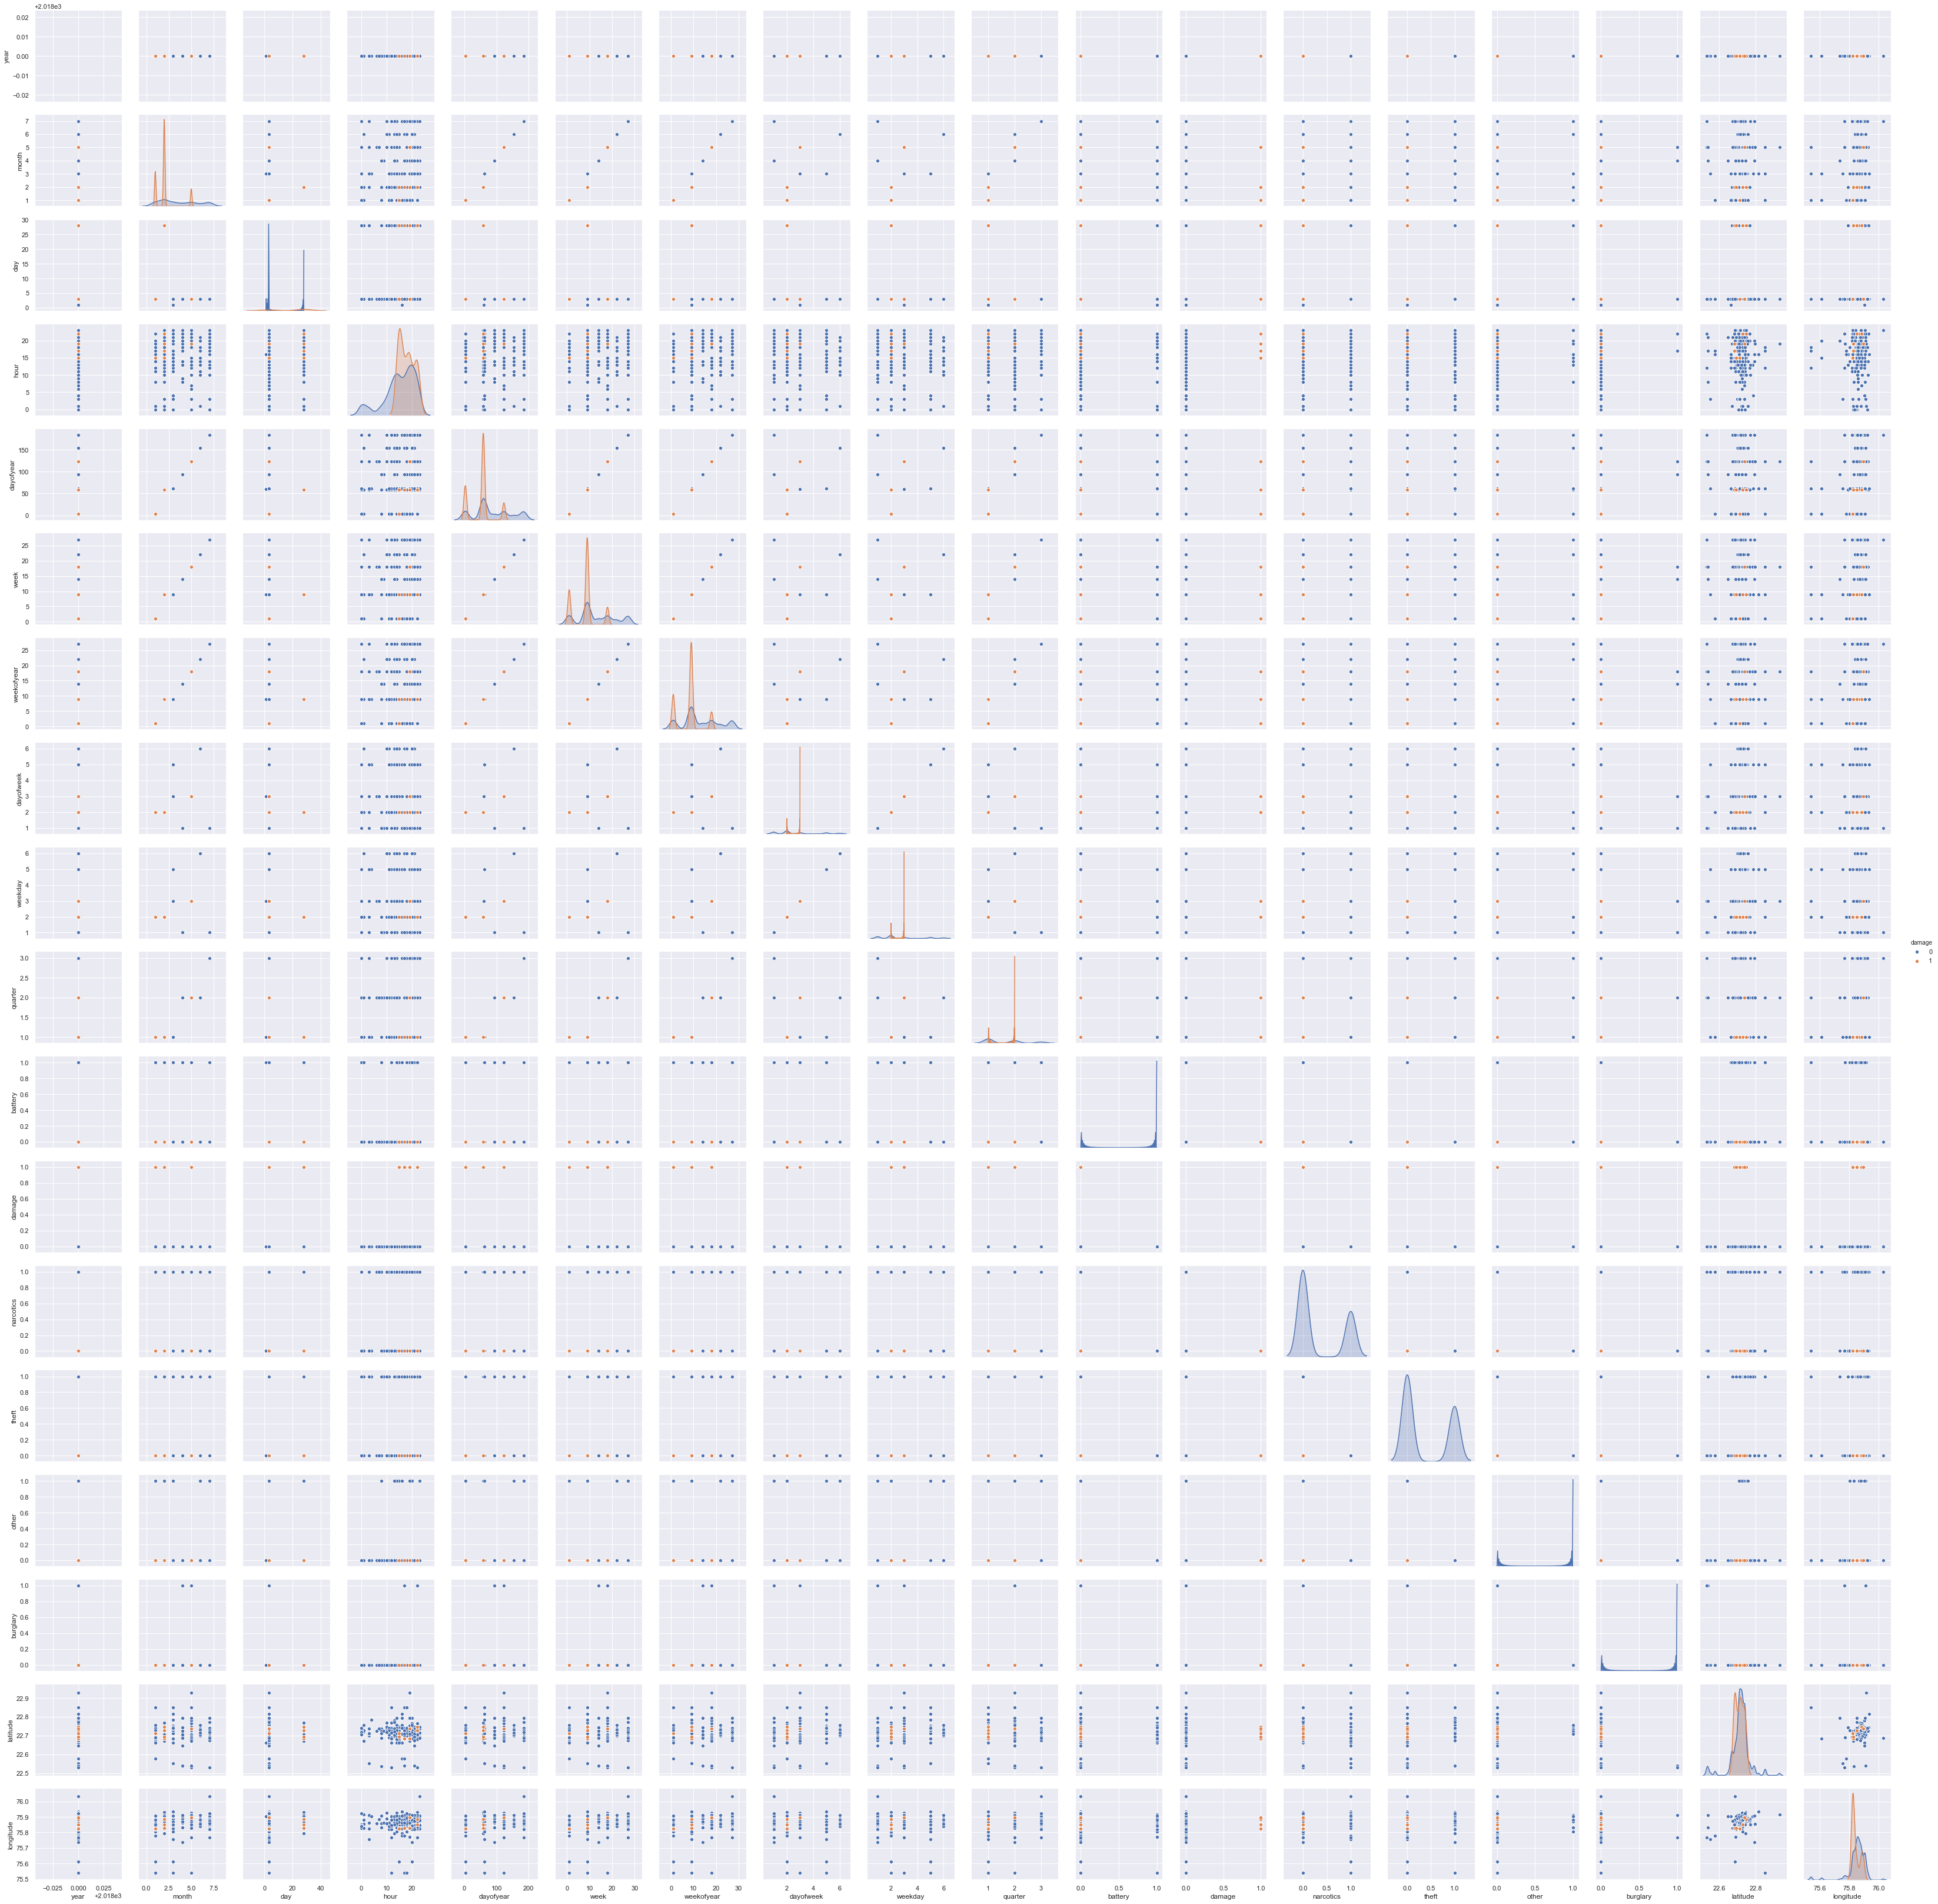

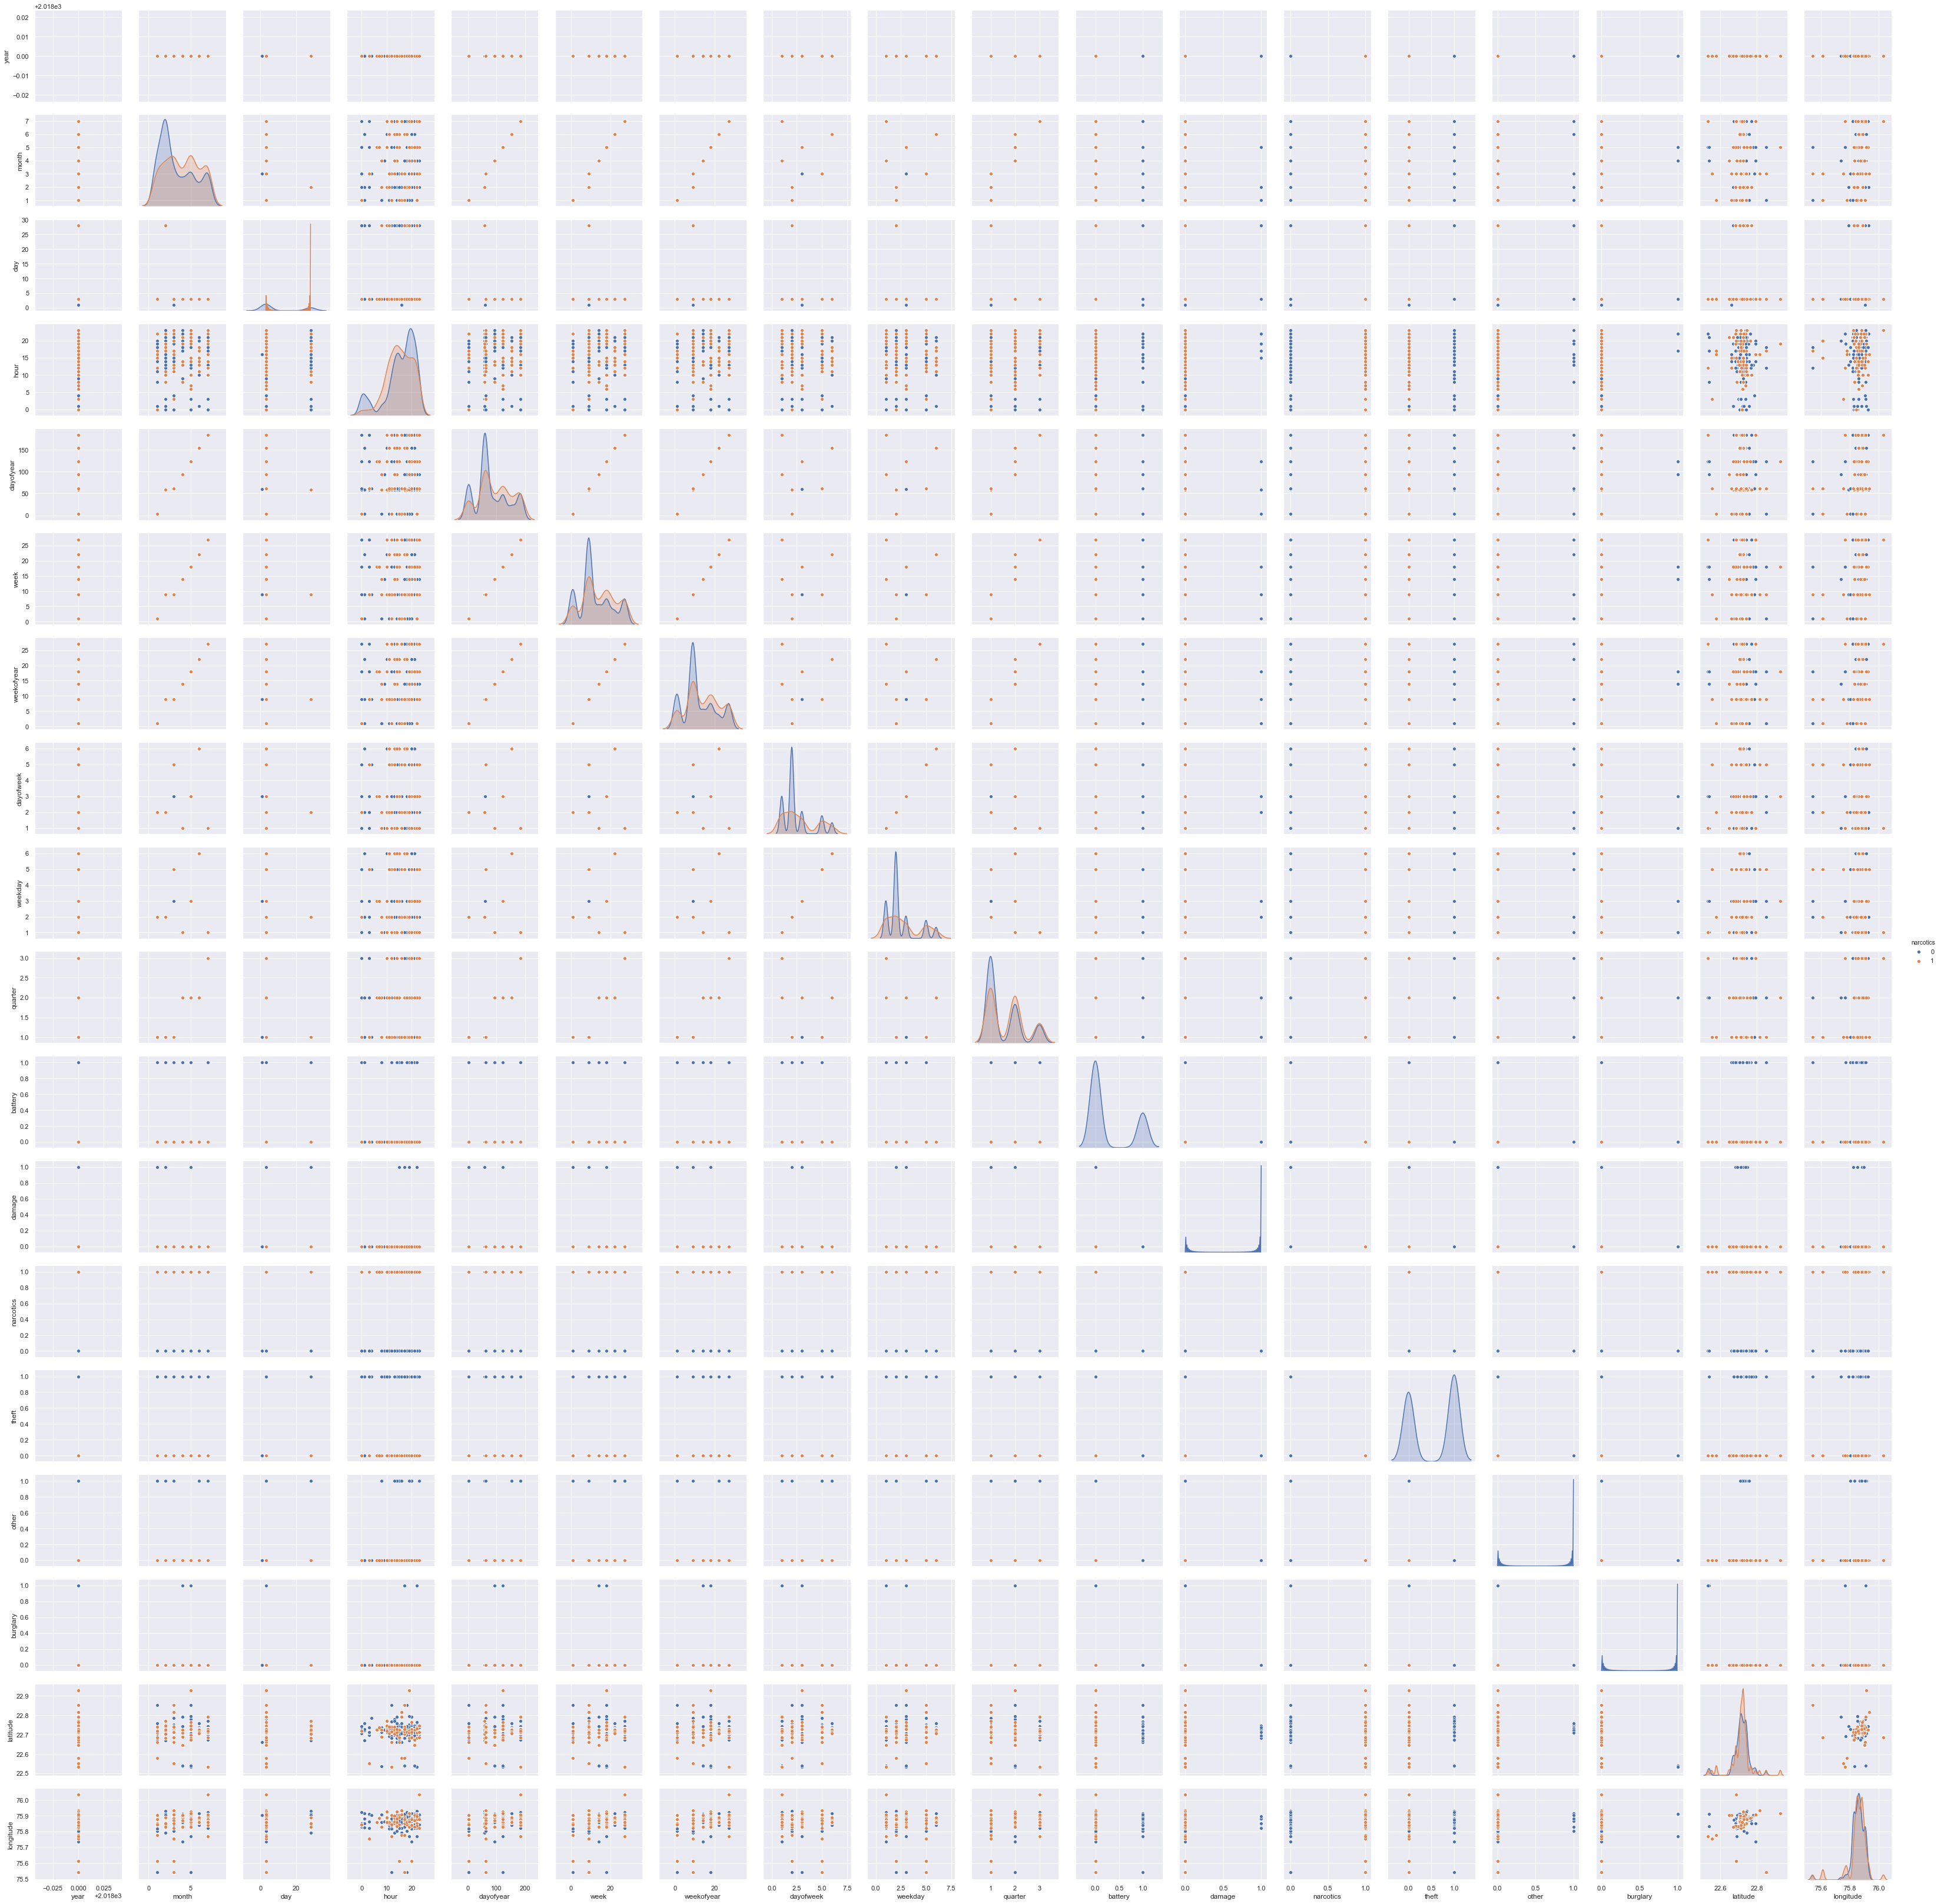

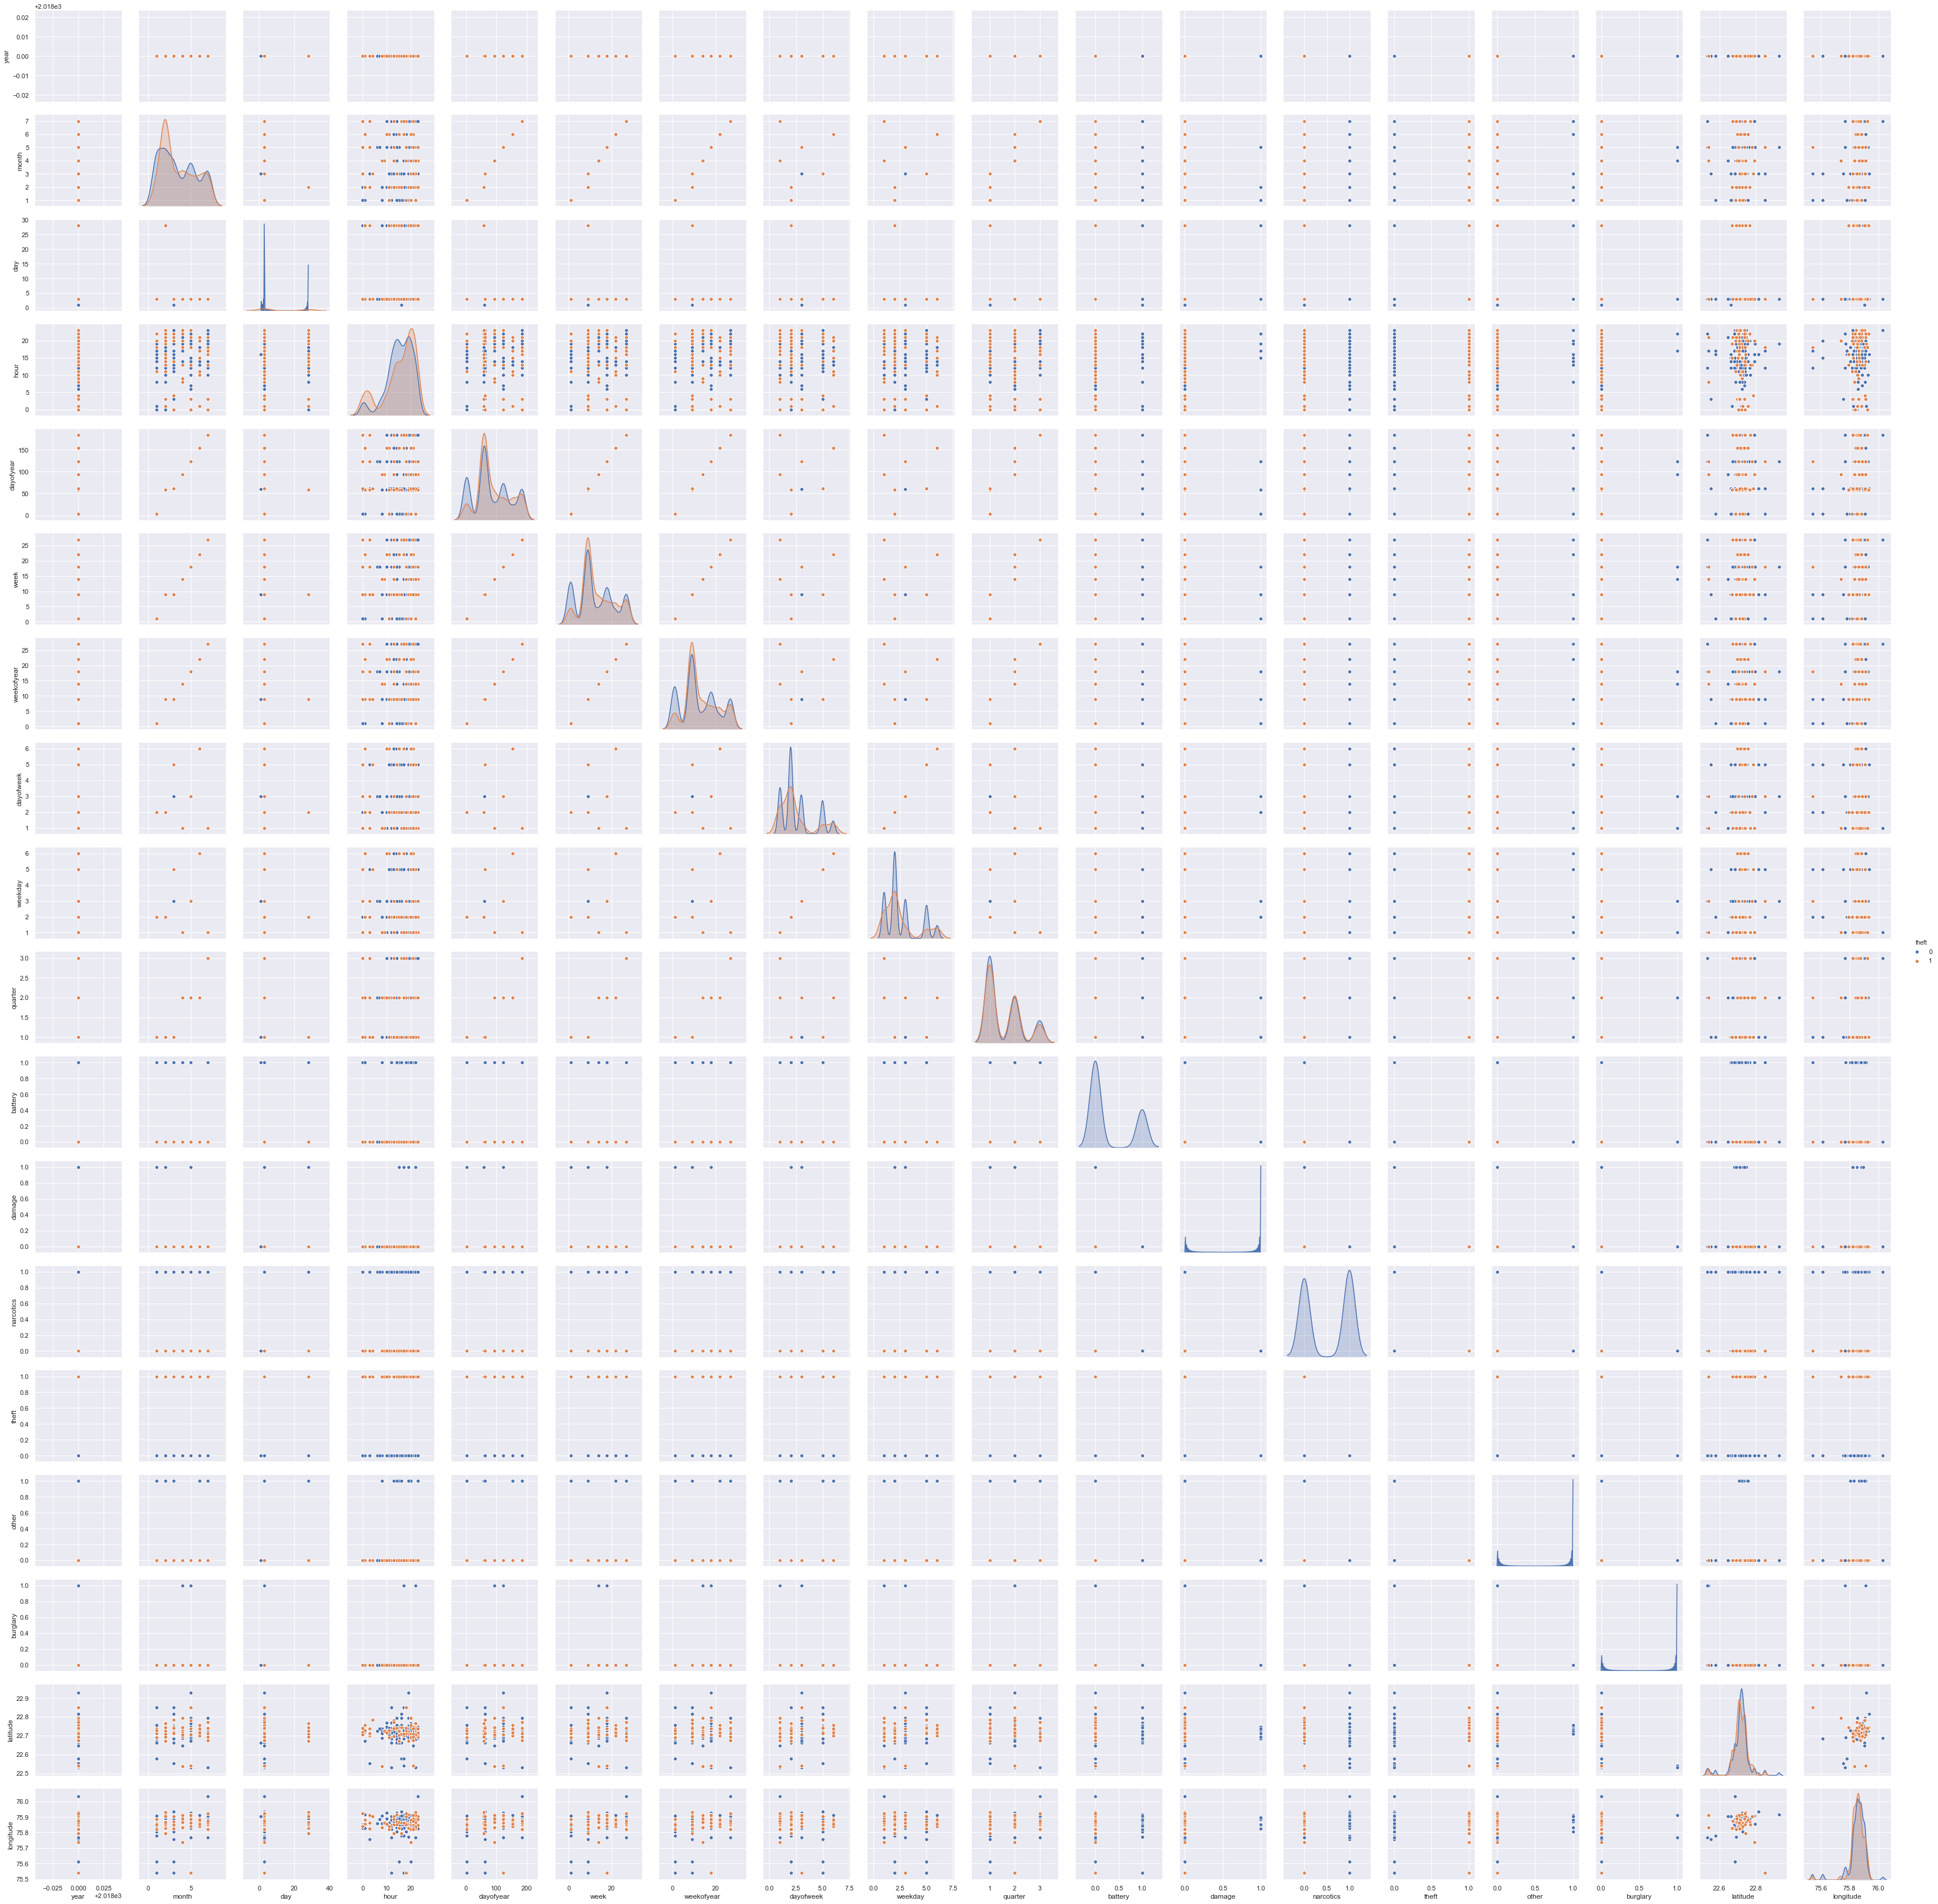

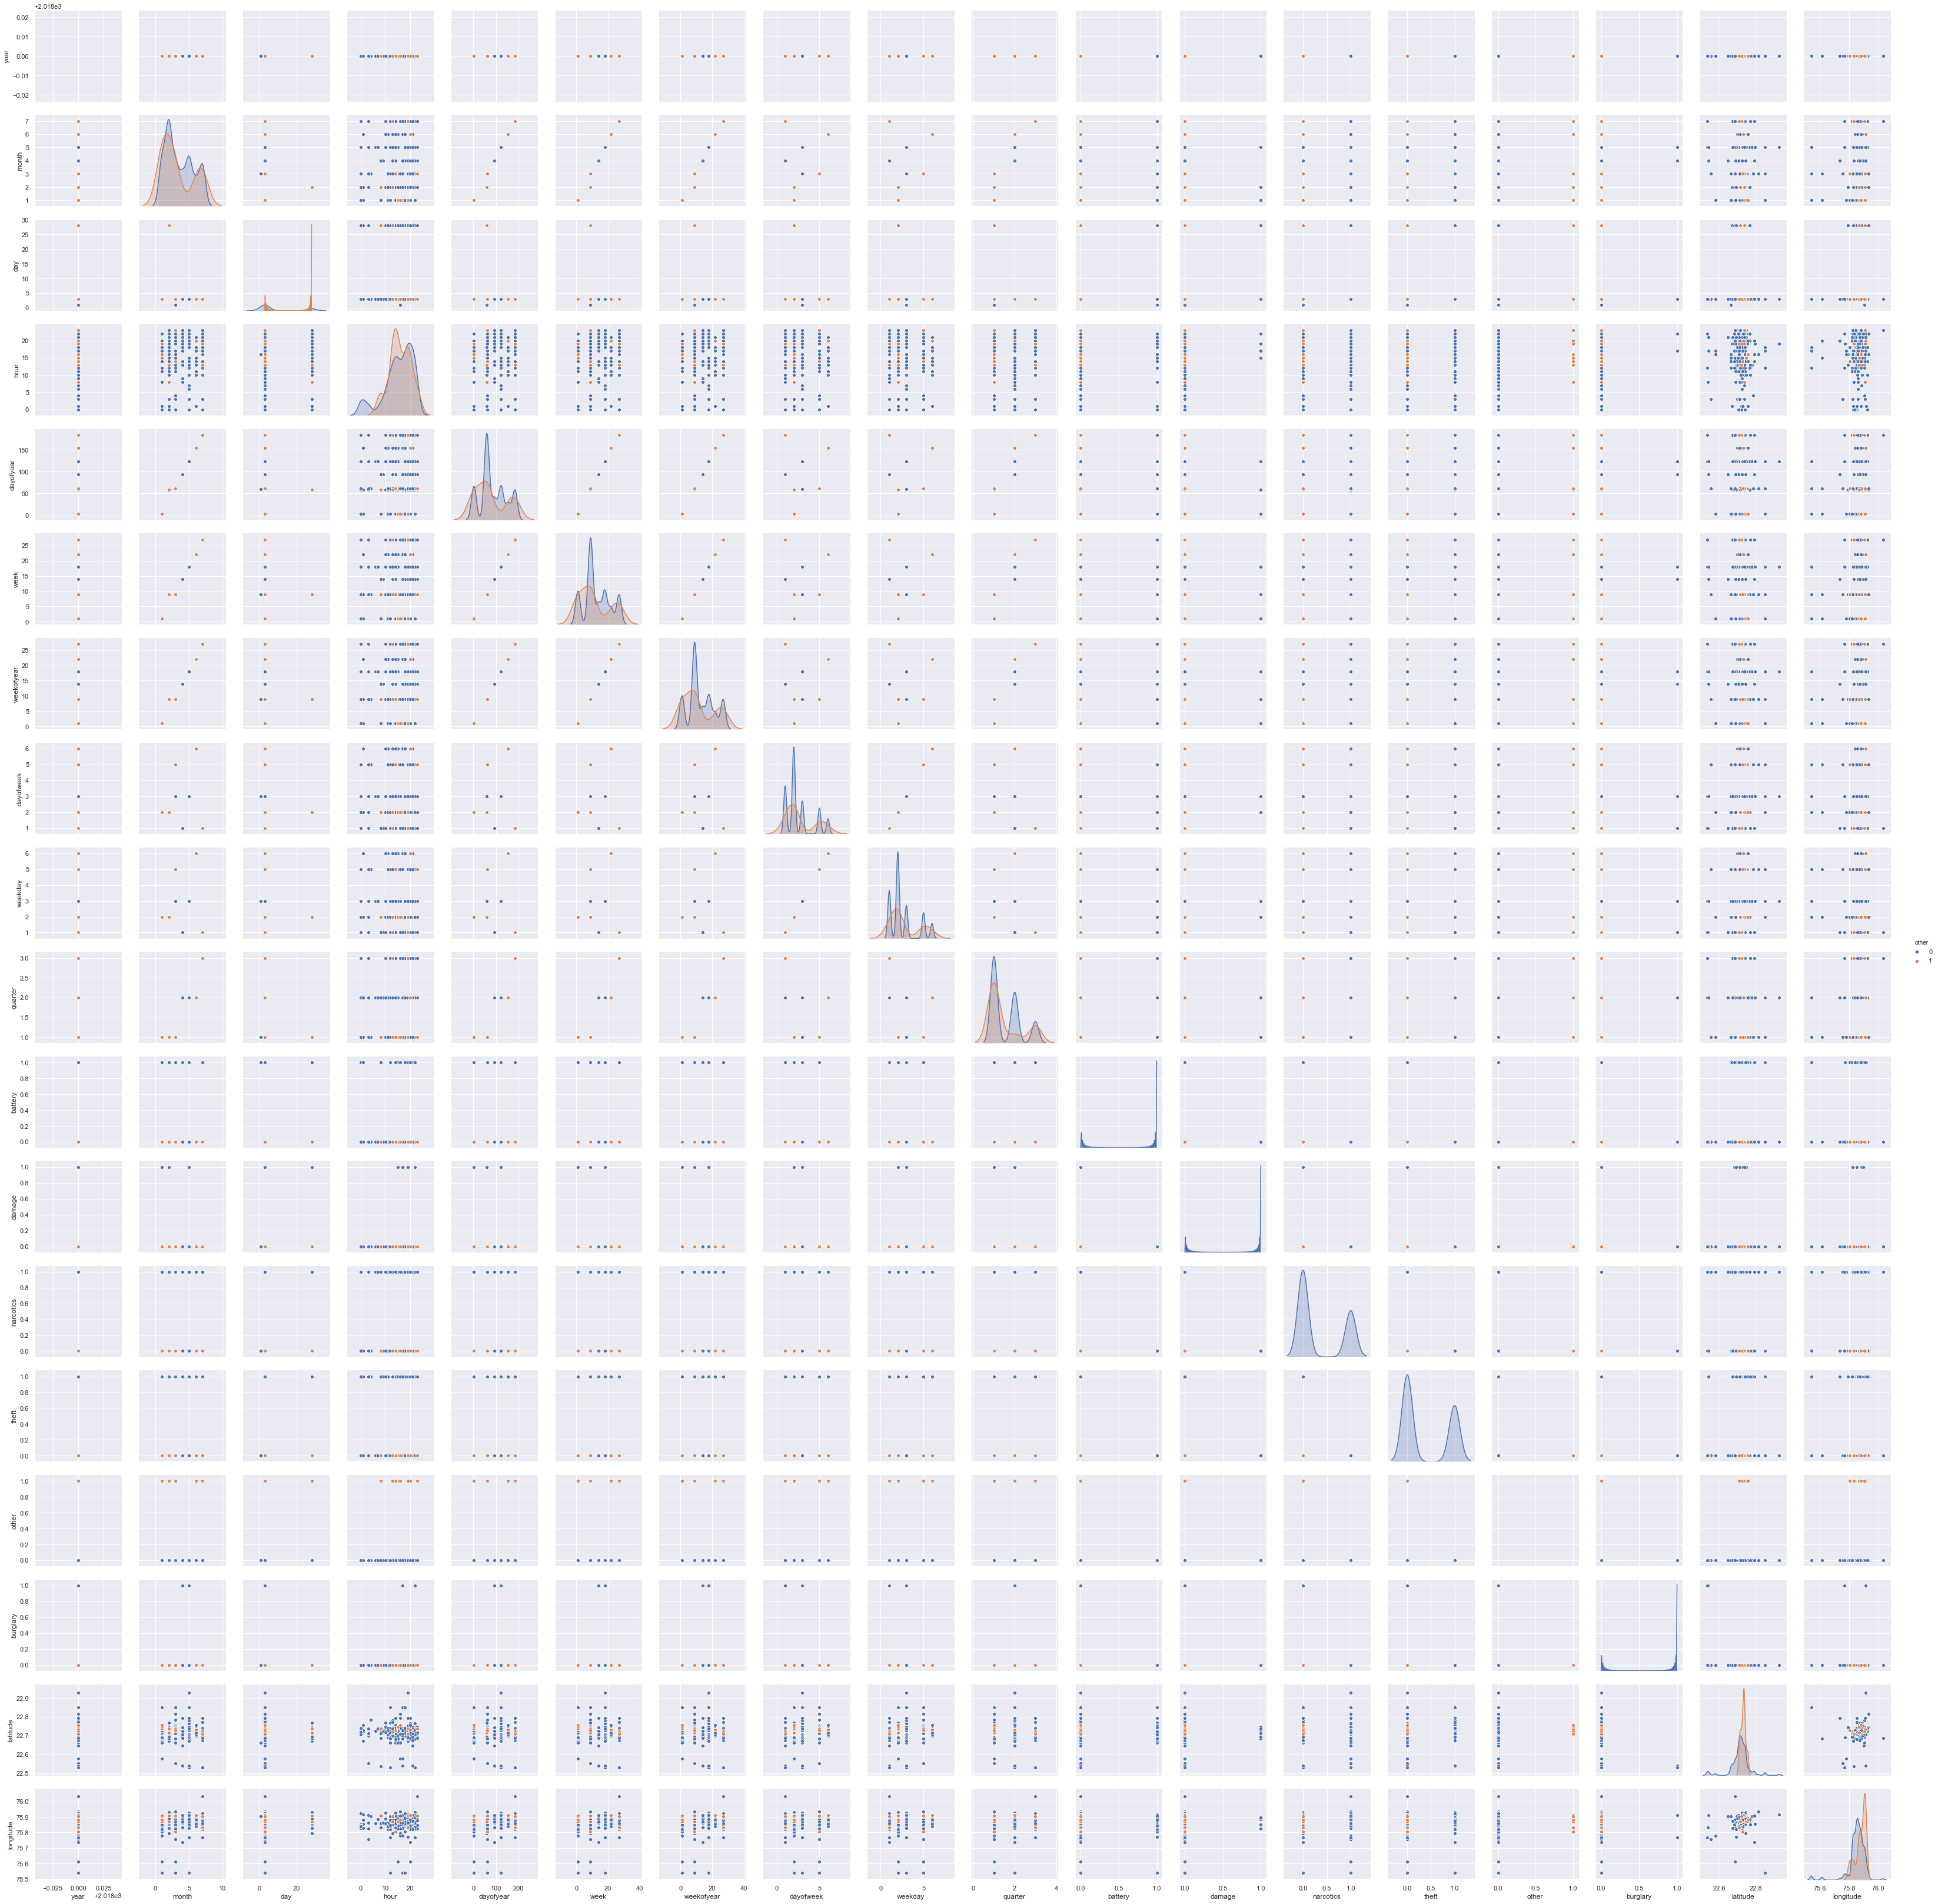

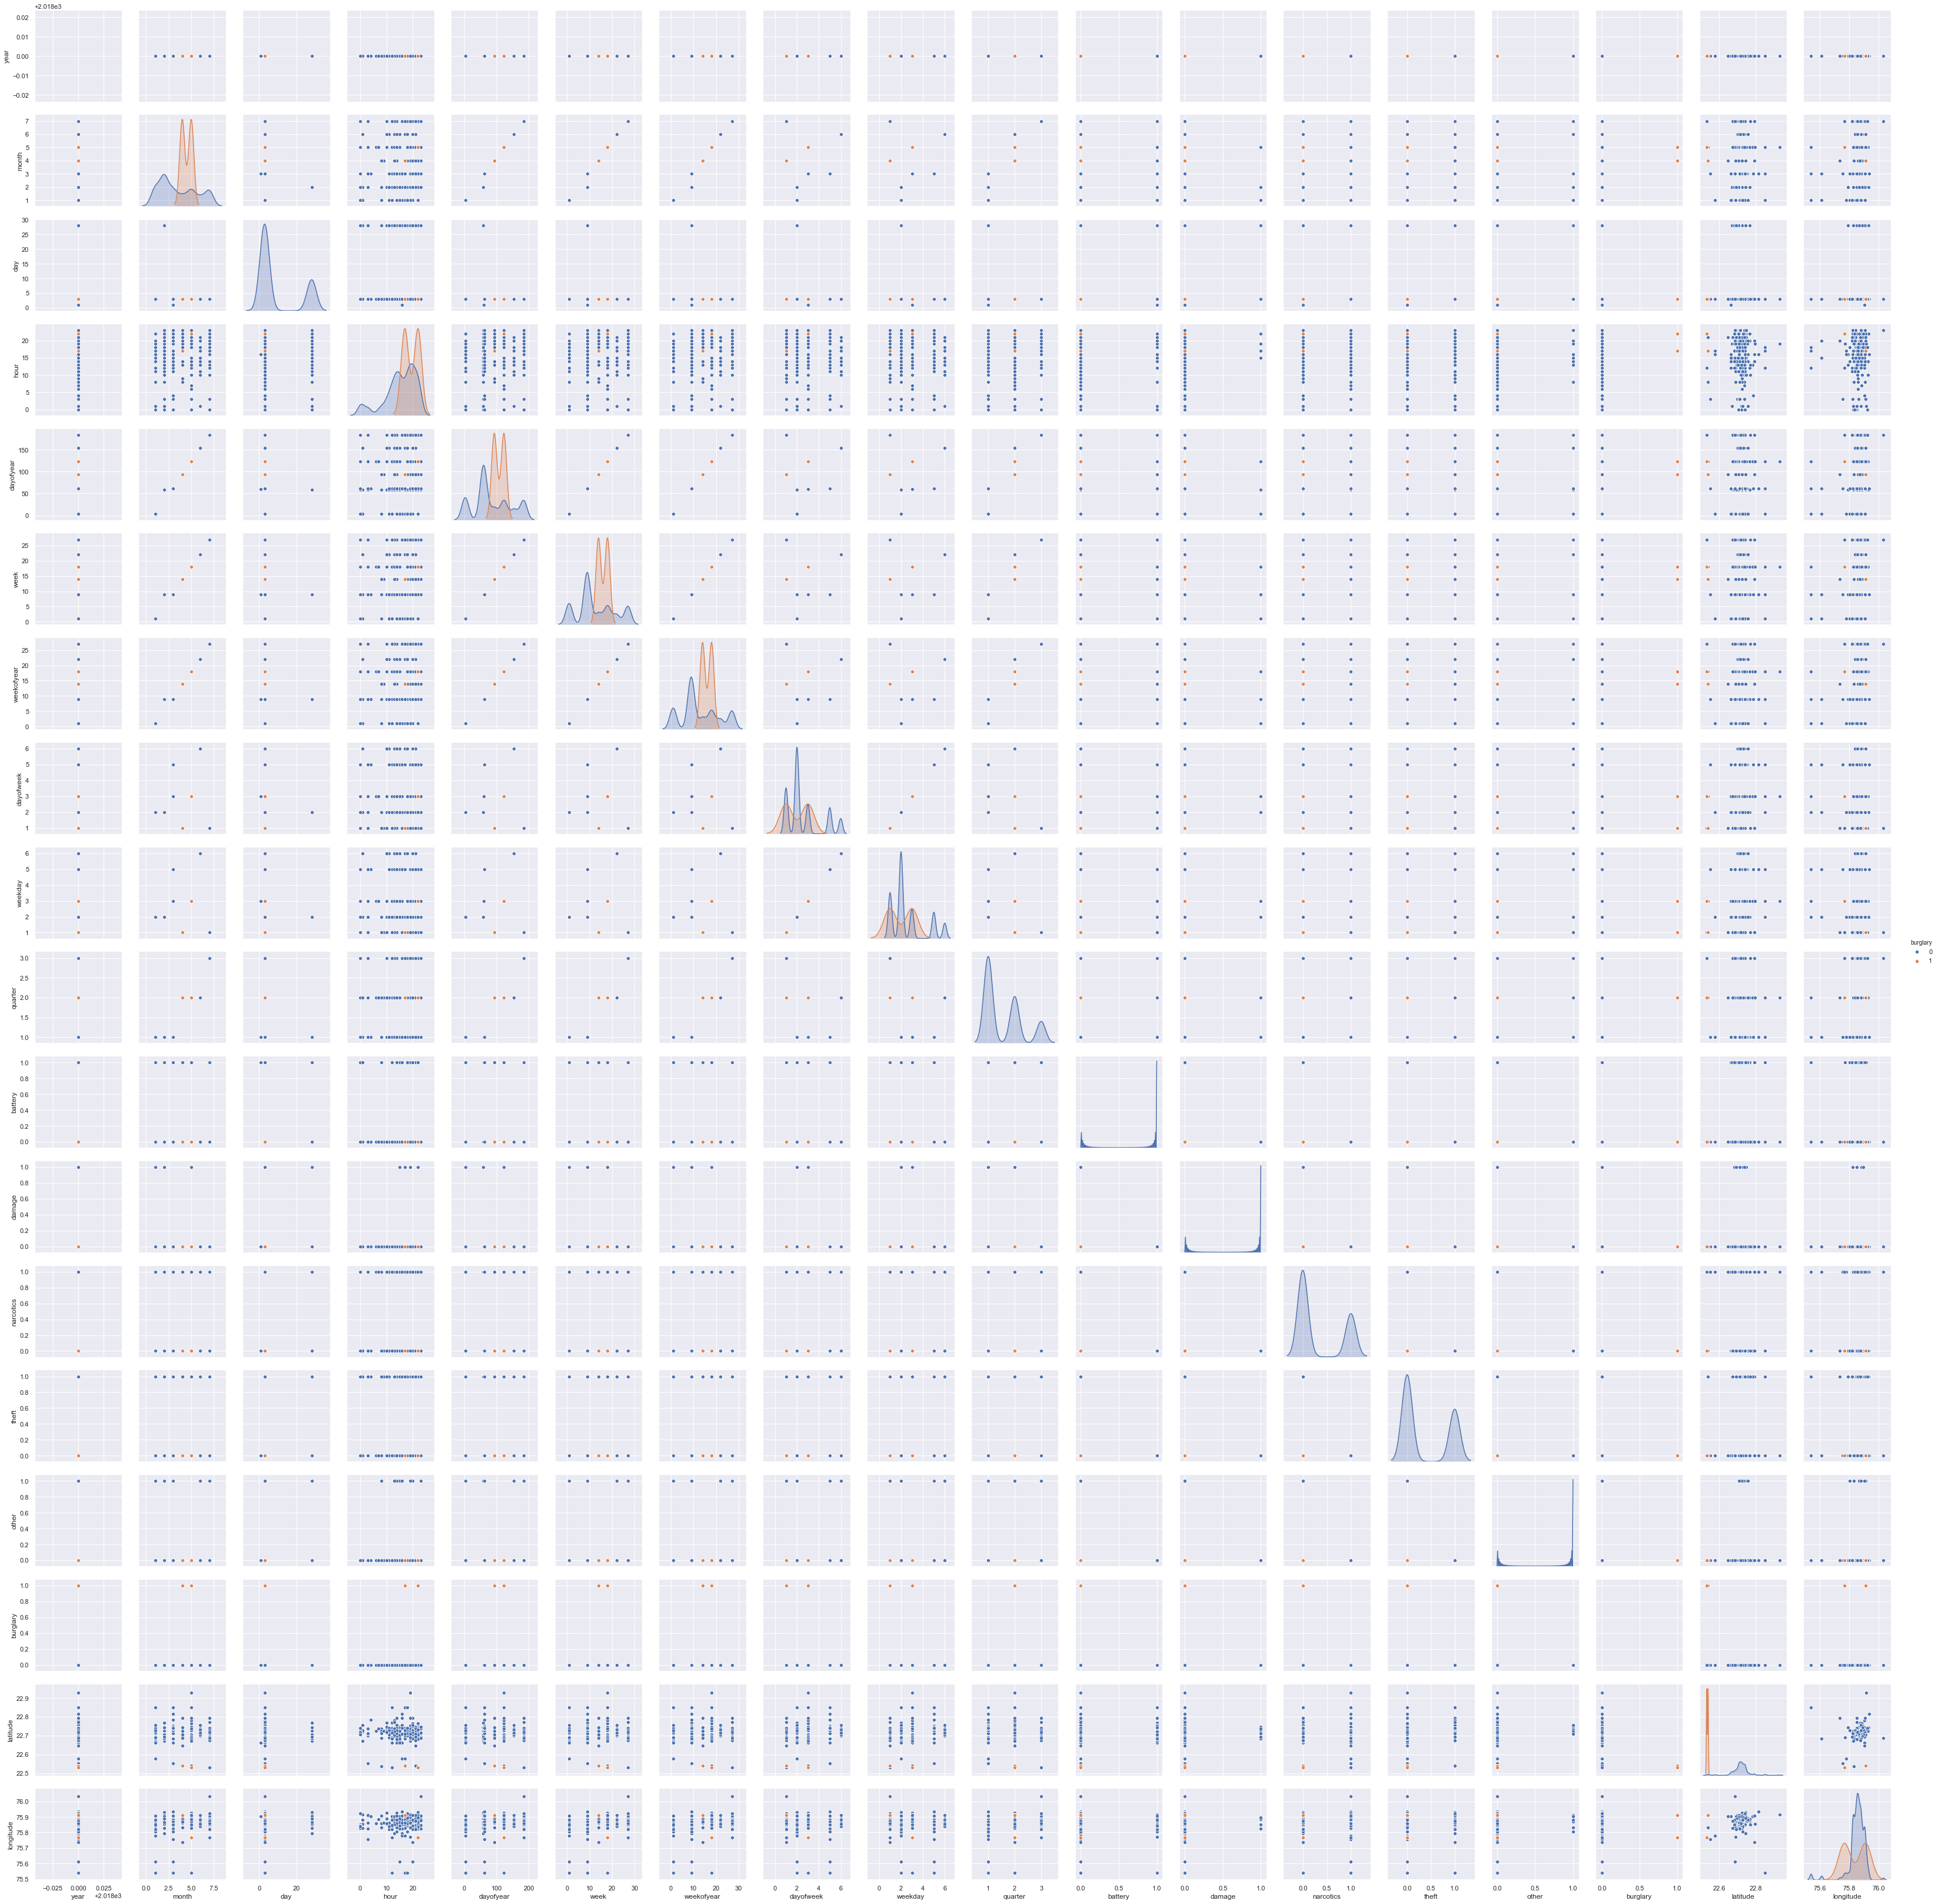

In [29]:
import seaborn as sns
%matplotlib inline
import os
for c in ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']:
    png = c + '-seaborn-pair.png'
    file = os.path.join('Figures', png)
    sns.set()
    sns_plot = sns.pairplot(df,hue=c)
    sns_plot.savefig(file)

In [30]:
#import IPython.display as display
#from PIL import Image
#display.display(Image.open(file))

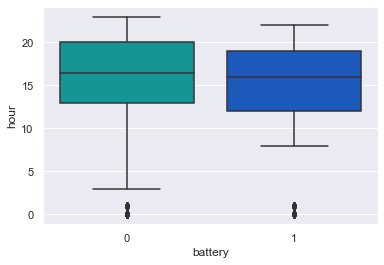

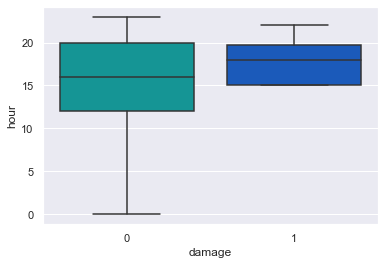

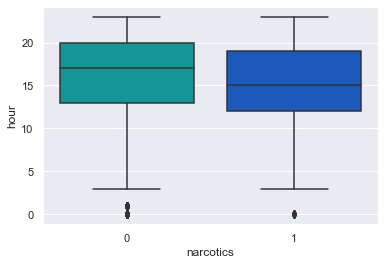

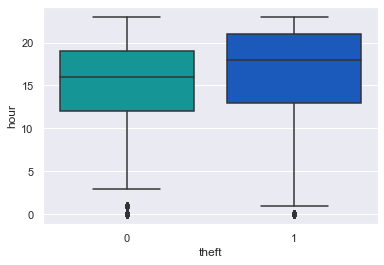

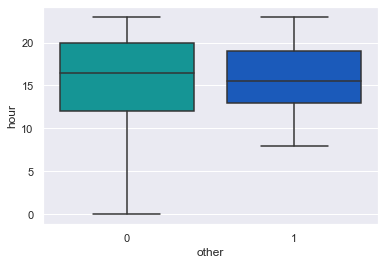

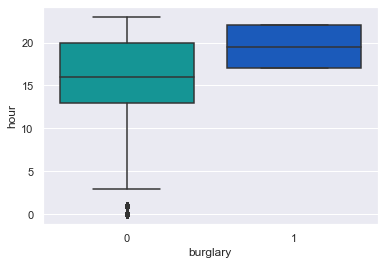

In [31]:
for c in ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']:
    png = c + '-seaborn-box.png'
    file = os.path.join('Figures', png)
    sns.set()
    fig, ax = plt.subplots()
    sns.boxplot(x=c ,y='hour' ,data=df, palette='winter_r')
    plt.savefig(file)

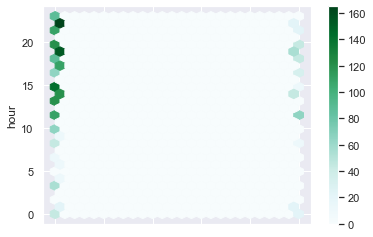

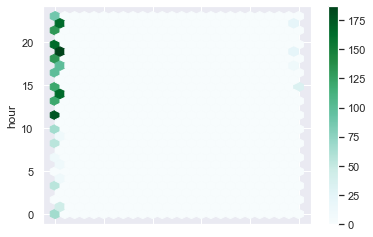

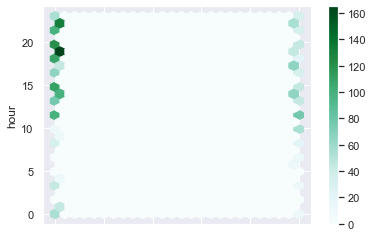

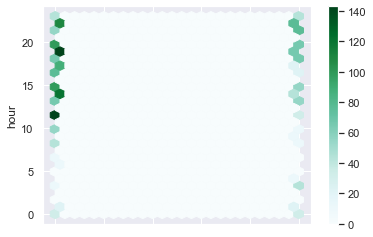

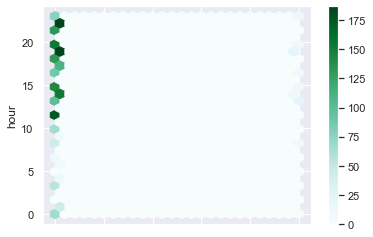

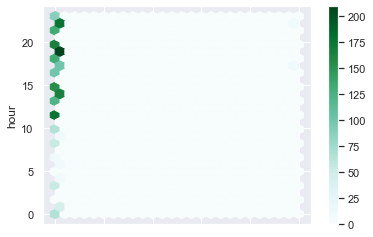

In [32]:
for c in ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']:
    png = c + '-hexbin.png'
    file = os.path.join('Figures', png)
    df1 = pd.DataFrame(data=df, columns=[c, 'hour', 'day'])
    df1.plot.hexbin(x=c,y='hour',gridsize=25)
    plt.savefig(file)

In [33]:
df1 = pd.DataFrame(data=df, columns=['damage', 'hour', 'day'])

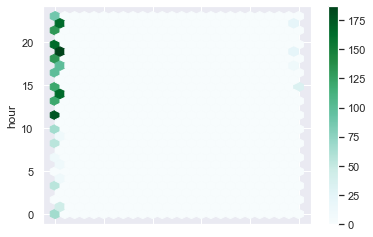

In [34]:
df1.plot.hexbin(x='damage',y='hour',gridsize=25)

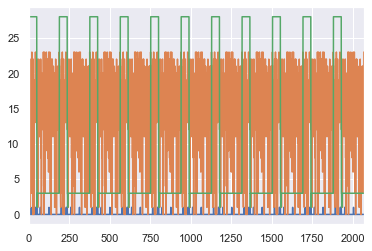

In [35]:
df1.plot(legend=False)

In [36]:
df1 = pd.DataFrame(data=df, columns=['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary'])
df1.head()

,battery,damage,narcotics,theft,other,burglary
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


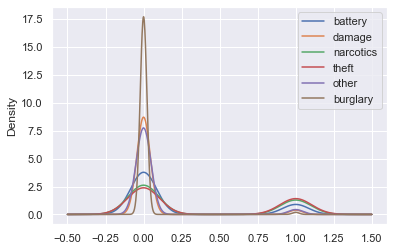

In [37]:
df1.plot.kde()
file = os.path.join('Figures', 'kde.png')
plt.savefig(file)

#   XY array

In [38]:
X=df.iloc[:,[1,2,3,4,6,16,17]].values
Y=df.iloc[:,[10,11,12,13,14,15]].values

In [39]:
X

array([[ 2.      , 28.      , 21.      , ...,  9.      , 22.73726 ,
        75.875987],
       [ 2.      , 28.      , 21.      , ...,  9.      , 22.720992,
        75.876083],
       [ 2.      , 28.      , 10.      , ...,  9.      , 22.736676,
        75.883168],
       ...,
       [ 7.      ,  3.      , 12.      , ..., 27.      , 22.531931,
        75.769126],
       [ 7.      ,  3.      , 10.      , ..., 27.      , 22.719569,
        75.857726],
       [ 7.      ,  3.      , 23.      , ..., 27.      , 22.686437,
        76.032055]])

In [40]:
Y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

## Splitting the data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

# Creating & Training KNN Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [44]:
knn.score(X_test,y_test)

0.9323671497584541

In [45]:
knn.score(X_train,y_train)

0.9770253929866989

## Elbow Method For optimum value of K

In [46]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(numpy.mean(pred_i != y_test))

## Creating & Training Decision Tree Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=300, splitter='best')

In [49]:
y_pred=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.9806763285024155

In [50]:
dtree.score(X_train,y_train)

0.9915356711003628

In [51]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [52]:
treefeatures=dtree.feature_importances_
indices = numpy.argsort(treefeatures)

In [53]:
treefeatures

array([0.00934881, 0.03958678, 0.3138252 , 0.09146966, 0.0174176 ,
       0.26411523, 0.26423671])

In [54]:
features = df.iloc[:,[1,2,3,4,6,16,17]]
features.head()

,month,day,hour,dayofyear,weekofyear,latitude,longitude
0,2.0,28.0,21.0,59.0,9.0,22.737260,75.875987
1,2.0,28.0,21.0,59.0,9.0,22.720992,75.876083
2,2.0,28.0,10.0,59.0,9.0,22.736676,75.883168
3,2.0,28.0,10.0,59.0,9.0,22.746527,75.887139
4,2.0,28.0,10.0,59.0,9.0,22.769531,75.888772


Text(0.5, 0, 'Relative Importance')

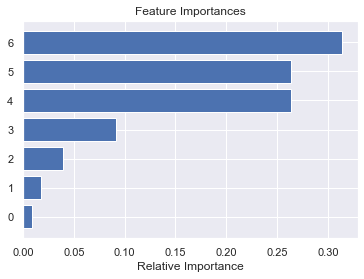

In [55]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.xlabel('Relative Importance')

#  Tree visualation

In [57]:
feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']

In [59]:
#  To run this tree visulation:
#   conda install pydot-ng 
#   conda install graphviz
#   execute graphviz-2.38.msi from https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
file = os.path.join('Figures', 'treeview.png')
plt.savefig(file)

<Figure size 432x288 with 0 Axes>

## Creating & Training Random Tree Model

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_pred=rfc.predict(X_test)

In [62]:
rfc.score(X_test,y_test)

0.9806763285024155

In [63]:
rfc.score(X_train,y_train)

0.9915356711003628

In [64]:
om=rfc.feature_importances_
indices = numpy.argsort(om)

In [65]:
om

array([0.04094823, 0.02132106, 0.31313451, 0.03960994, 0.03404901,
       0.28193526, 0.269002  ])

In [66]:
features = df.columns

Text(0.5, 0, 'Relative Importance')

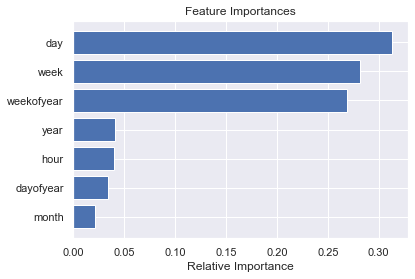

In [67]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')